In [168]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as mpl
from IPython.core.pylabtools import figsize

In [169]:
# mpl.rcParams['font.size'] = 24
figsize(15,15)
pd.set_option('display.max_columns', 60)

In [170]:
df: pd.DataFrame = pd.read_csv('./data/energy.csv')
df

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

Замена Not Available

In [172]:
df = df.replace({ 'Not Available': np.NaN })


In [173]:
for col in list(df.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        df[col] = df[col].astype(float)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [175]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,11746.0,7.185760e+03,4.323860e+03,1.000000e+00,3.428250e+03,6.986500e+03,1.105450e+04,1.499300e+04
Property Id,11746.0,3.642958e+06,1.049070e+06,7.365000e+03,2.747222e+06,3.236404e+06,4.409092e+06,5.991312e+06
DOF Gross Floor Area,11628.0,1.732695e+05,3.367055e+05,5.002800e+04,6.524000e+04,9.313850e+04,1.596140e+05,1.354011e+07
Largest Property Use Type - Gross Floor Area (ft²),11744.0,1.605524e+05,3.095746e+05,5.400000e+01,6.520100e+04,9.132400e+04,1.532550e+05,1.421712e+07
2nd Largest Property Use - Gross Floor Area (ft²),3741.0,2.277868e+04,5.509444e+04,0.000000e+00,4.000000e+03,8.654000e+03,2.000000e+04,9.624280e+05
3rd Largest Property Use Type - Gross Floor Area (ft²),1484.0,1.201683e+04,2.795976e+04,0.000000e+00,1.720750e+03,5.000000e+03,1.200000e+04,5.916400e+05
Year Built,11746.0,1.948738e+03,3.057639e+01,1.600000e+03,1.927000e+03,1.941000e+03,1.966000e+03,2.019000e+03
Number of Buildings - Self-reported,11746.0,1.289971e+00,4.017484e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.610000e+02
Occupancy,11746.0,9.876256e+01,7.501603e+00,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
ENERGY STAR Score,9642.0,5.985459e+01,2.999359e+01,1.000000e+00,3.700000e+01,6.500000e+01,8.500000e+01,1.000000e+02


In [176]:
percentage = (df.isna().sum() * 100 / len(df))

In [177]:
missing_columns = percentage[percentage >= 50].index

In [178]:
df.drop(columns=missing_columns,inplace=True )

In [179]:
df

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447.0,1963,2,100,Whole Building,NaN,NaN,305.6,303.1,37.8,NaN,614.2,NaN,NaN,38139374.2,11082770.5,6962.2,0.0,6962.2,762051.0,NaN,NaN,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.0,1969,12,100,Whole Building,Whole Building,55.0,229.8,228.8,24.8,2.4,401.1,933073441.0,9330734.4,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181.0,NaN,NaN,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.0,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,231342.0,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.0,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1305748.0,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,FT WASHINGTON AVENUE,Manhattan,211400.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),179694.0,1932,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,179694.0,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,14988,494

Разведочный анализ

In [180]:
df.rename(columns = {'ENERGY STAR Score': 'score'}, inplace=True)

Посмотрим распределение процента энергоэффективности и количества зданий

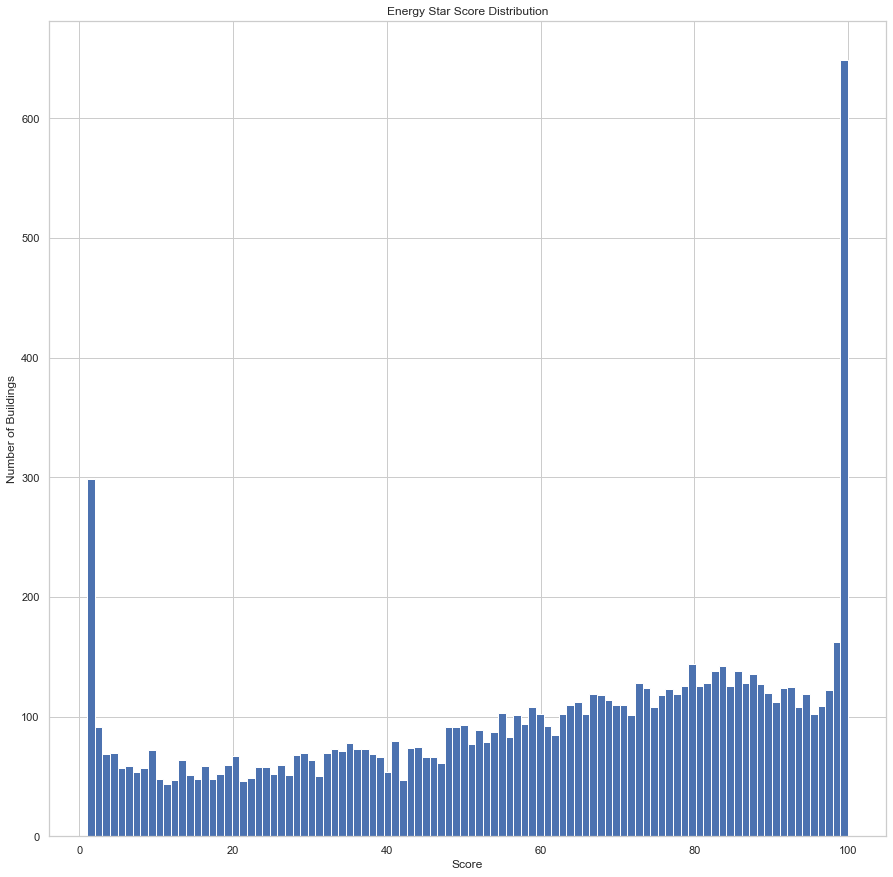

In [181]:
mpl.hist(df.score.dropna(), bins=100)
mpl.xlabel('Score'); mpl.ylabel('Number of Buildings'); 
mpl.title('Energy Star Score Distribution');

Посмотрим распределение значения по зданиям

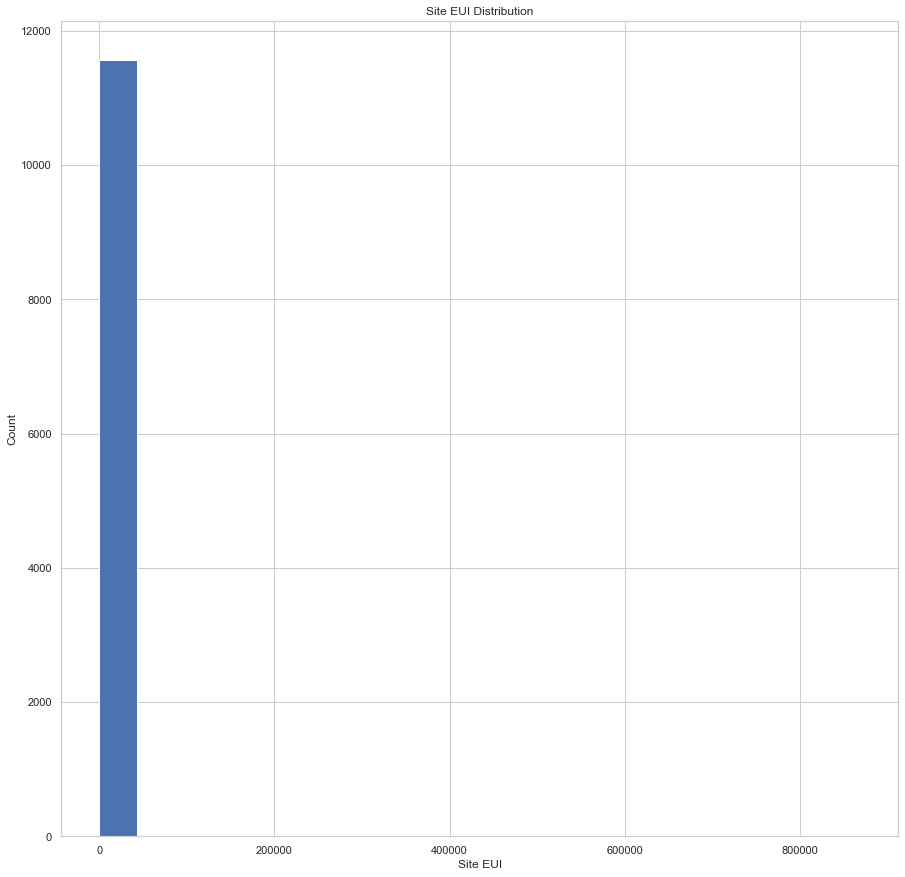

In [182]:
mpl.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins=20)
mpl.xlabel('Site EUI'); 
mpl.ylabel('Count'); mpl.title('Site EUI Distribution');

In [183]:
df['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

Есть выброс в значении, одно здание больше других по значению

Удаление выбросов

In [184]:
first_quartile = df['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = df['Site EUI (kBtu/ft²)'].describe()['75%']

irq = third_quartile - first_quartile

df = df[(df['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * irq)) &
        (df['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * irq))]


In [185]:
df

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,101 Clark St,11201,NaN,NaN,NaN,NaN,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503.0,1903,2,100,Whole Building,Whole Building,93.0,32.0,NaN,7.5,0.0,NaN,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.0,51.01,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
17,20,2777309,Barnard College,2777309,Barnard College,1019890001,1-01989-0001,1082351;1079204;1082351;1082347;1079205;1082350,3009 Broadway,10029,NaN,NaN,NaN,NaN,College/University,"College/University, Residence Hall/Dormitory",College/University,323000.0,1907,7,100,Whole Building,NaN,NaN,120.0,125.2,8.7,0.9,193.6,52441239.4,556997.6,17958140.6,5217062.4,4554.7,2888.2,1666.5,598000.0,NaN,NaN,188.7,05/01/2017 12:50:51 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
18,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,10040,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,1939,2,100,Whole Building,Whole Building,72.0,76.2,79.9,3.5,0.0,106.2,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.6,18.40,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
19,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,1939,1,100,Whole Building,NaN,67.0,75.7,79.0,4.0,0.0,109.1,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,NaN,NaN,106.6,05/01/2017 10:09:31 PM,NaN,In Compliance,40.857943,-73.934962,12.0,10.0,281.0,Washington Heights North ...
20,23,4988569,- 730 Ft. Washington Ave bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800628,1021800628,1064476;1803806,720-730 Ft. Washington Ave.,10040,730,FT WASHINGTON AVENUE,Manhattan,102150.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,116744.0,1939,1,100,Whole Building,NaN,80.0,77.1,82.7,2.6,0.0,102.8,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,NaN,NaN,97.7,05/01/2017 10:09:31 PM,Yes,In Compliance,40.858256,-73.934734,12.0,10.0,281.0,Washington Heights North ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,14988,4940453,Advanced: 24 Monroe Place,Not Applicable

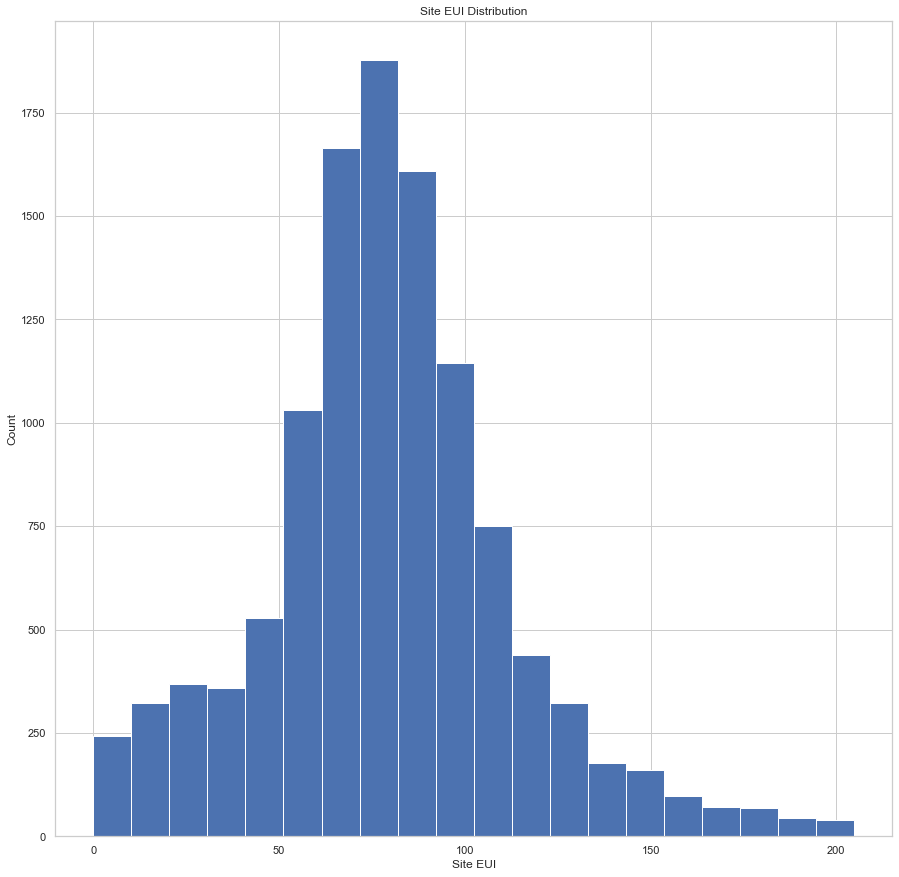

In [186]:
mpl.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins=20)
mpl.xlabel('Site EUI'); 
mpl.ylabel('Count'); mpl.title('Site EUI Distribution');

Поиск взаимосвязи

In [187]:
df['Largest Property Use Type'].unique()

array(['Multifamily Housing', 'College/University',
       'Residence Hall/Dormitory', 'Office', 'Medical Office', 'Library',
       'Social/Meeting Hall', 'Other', 'Self-Storage Facility',
       'Strip Mall', 'Retail Store', 'Bank Branch', 'Movie Theater',
       'Hospital (General Medical & Surgical)', 'Enclosed Mall',
       'K-12 School', 'Other - Recreation', 'Financial Office',
       'Manufacturing/Industrial Plant', 'Performing Arts',
       'Other - Lodging/Residential', 'Hotel',
       'Non-Refrigerated Warehouse', 'Parking',
       'Other - Entertainment/Public Assembly', 'Restaurant',
       'Senior Care Community', 'Worship Facility', 'Distribution Center',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Mall',
       'Other - Education', 'Museum', 'Automobile Dealership',
       'Other - Specialty Hospital', 'Residential Care Facility',
       'Outpatient Rehabilitation/Physical Therapy', 'Pre-school/Daycare',
       'Supermarket/Grocery Store', 'Mailing Center/Po

In [188]:
types = df.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

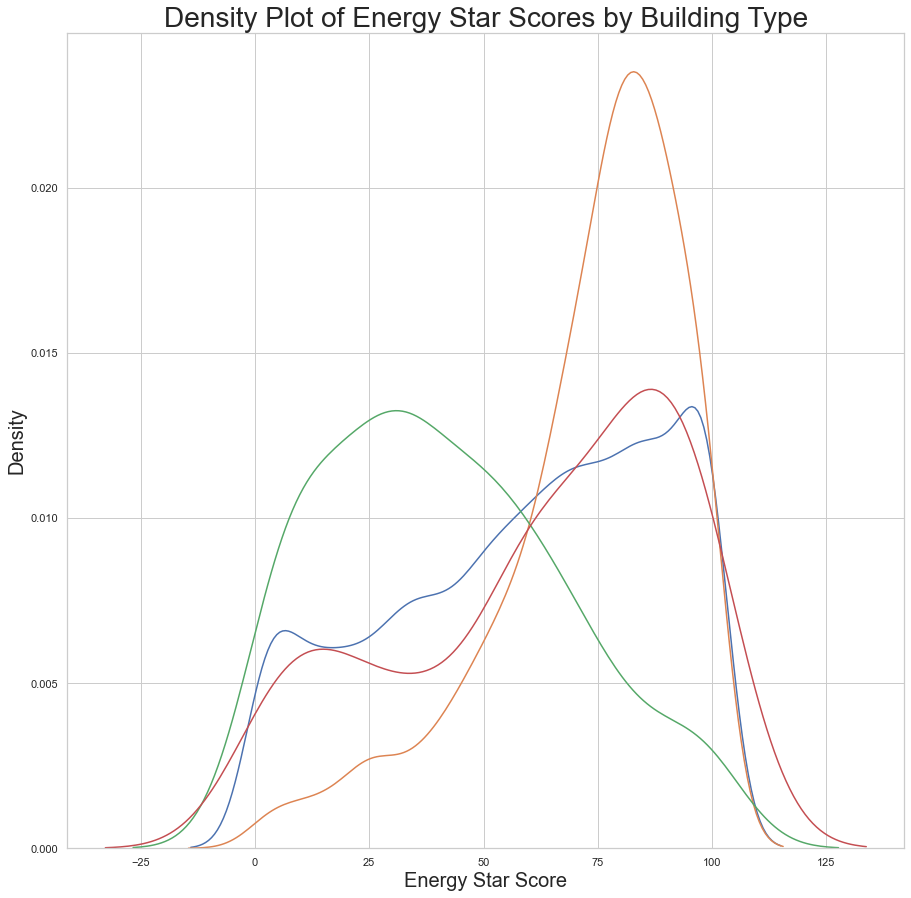

In [189]:
for b_type in types:
    subset = df[df['Largest Property Use Type'] == b_type]

    sb.kdeplot(subset.score.dropna(), label=b_type,shade=False)

mpl.xlabel('Energy Star Score', size = 20); mpl.ylabel('Density', size = 20); 
mpl.title('Density Plot of Energy Star Scores by Building Type', size = 28);

Из графика видно, что тип здания оказывает непосредственное влияние на энергоэффективность 

In [190]:
boroughs = df.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

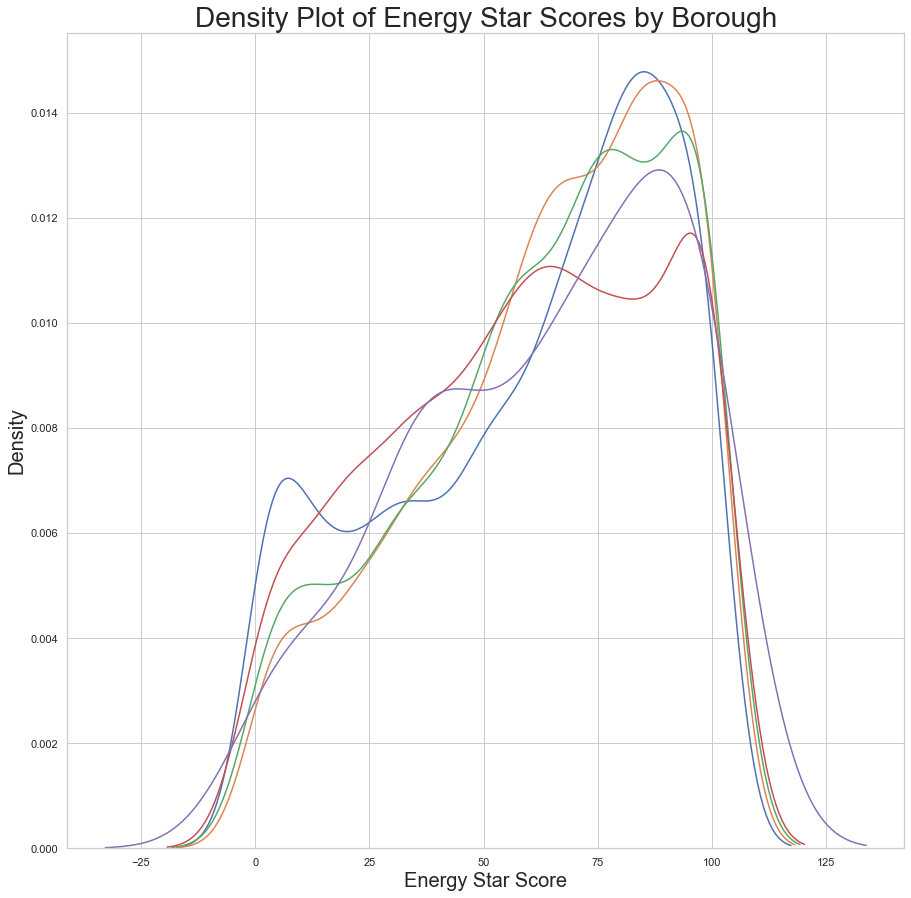

In [191]:
for brought in boroughs:
    subset = df[df['Borough'] == brought]

    sb.kdeplot(subset.score.dropna(), label=brought,shade=False)

mpl.xlabel('Energy Star Score', size = 20); mpl.ylabel('Density', size = 20); 
mpl.title('Density Plot of Energy Star Scores by Borough', size = 28);

Из графика выше можно сделать вывод, что район города не оказывает существенного влияния на энергоэффективность

Просмотр корреляций

Для начала посмотрим линейные корреляции в данных

In [192]:
df.corr().score.drop('score')

Order                                                         0.036827
Property Id                                                  -0.046605
DOF Gross Floor Area                                          0.013001
Largest Property Use Type - Gross Floor Area (ft²)            0.018330
Year Built                                                   -0.121249
Number of Buildings - Self-reported                          -0.022407
Occupancy                                                    -0.033215
Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Natural Gas Use (kBtu)                                       -0.133648
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Electr

Наблюдается несколько ярко выраженных отрицательных корреляций 

Попробуем посмотреть на квадратичные и логарифмические корреляции

In [193]:
numeric_columns = df.select_dtypes('number')

for col in list(numeric_columns):
    if col == 'score':
        continue
      
    numeric_columns['sqrt_' + col] = np.sqrt(numeric_columns[col])
    numeric_columns['log_' + col] = np.log(numeric_columns[col])

categorical_subset = df[['Borough', 'Largest Property Use Type']]
categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([categorical_subset, numeric_columns], axis=1)
features = features.dropna(subset=['score'])

correlation = features.corr()['score'].dropna().sort_values()

C:\Users\VPR\AppData\Local\Temp/ipykernel_12732/1562530172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns['sqrt_' + col] = np.sqrt(numeric_columns[col])
C:\Users\VPR\AppData\Local\Temp/ipykernel_12732/1562530172.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns['log_' + col] = np.log(numeric_columns[col])
c:\Users\VPR\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **

In [194]:
correlation[abs(correlation) > 0.4]

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

Поиск квадратичных и логарифмических зависимостей не дал больших результатов, а лишь укрепил тенденции отрицательно-линейных зависимостей

Проанализируем распределение типа здания на графике

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\VPR\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


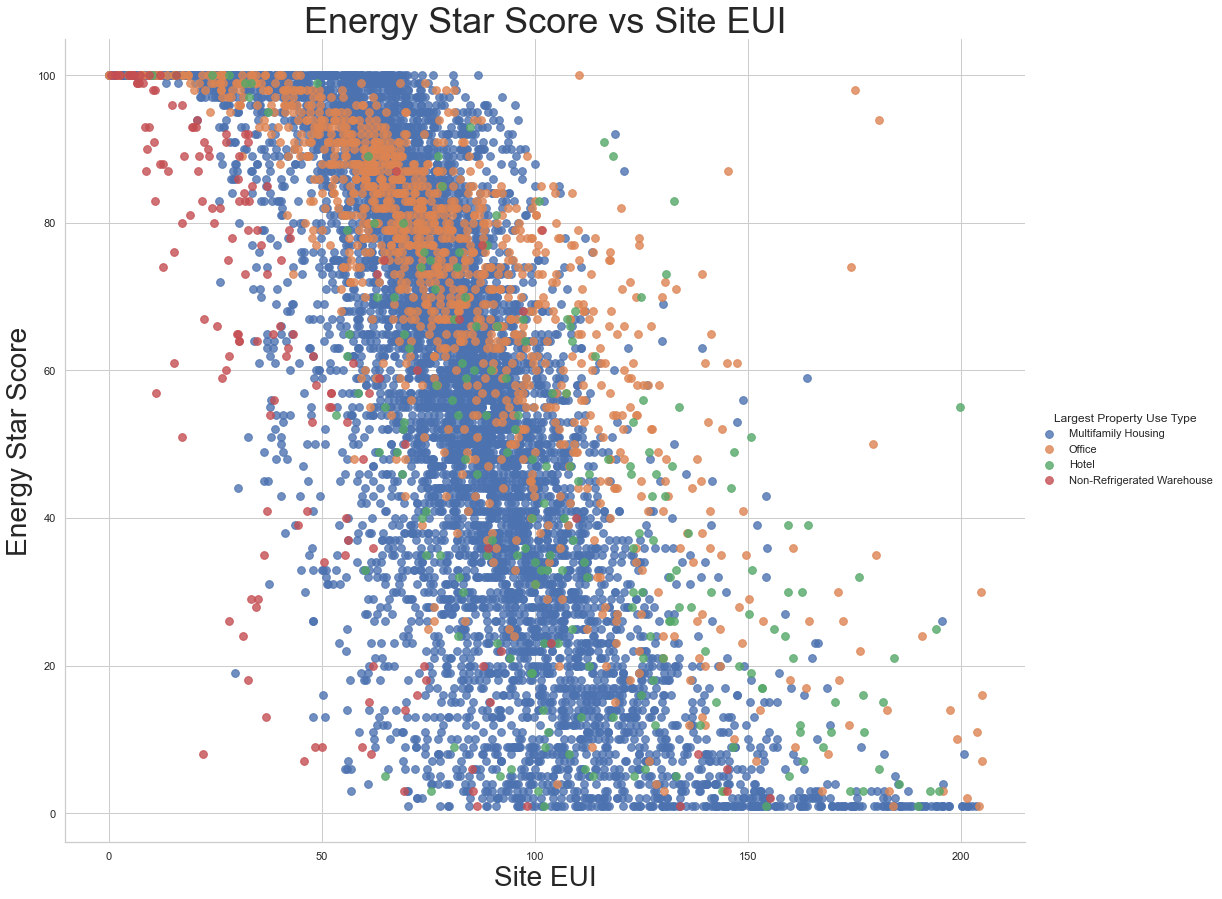

In [195]:
features['Largest Property Use Type'] = df.dropna(subset=['score'])['Largest Property Use Type']
features = features[features['Largest Property Use Type'].isin(types)]

sb.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue='Largest Property Use Type', data=features,
          scatter_kws={'s': 60},
          fit_reg=False,
          aspect=1.2,
           size = 12
          )
mpl.xlabel("Site EUI", size = 28)
mpl.ylabel('Energy Star Score', size = 28)
mpl.title('Energy Star Score vs Site EUI', size = 36);

График позволяет наглядно увидеть взаимосвязь score и Site EUI, те самые -0,7

Попарный график зависимости

c:\Users\VPR\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


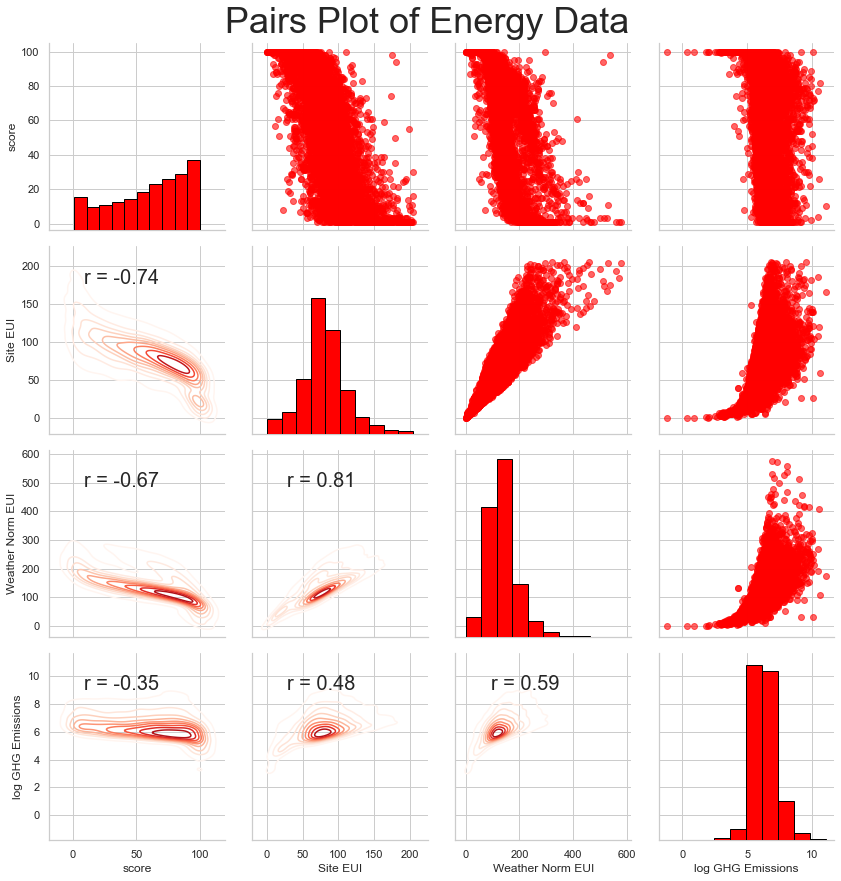

In [196]:
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})
plot_data = plot_data.dropna()

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = mpl.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
    

grid = sb.PairGrid(data = plot_data, size = 3)

grid.map_upper(mpl.scatter, color = 'red', alpha = 0.6)

grid.map_diag(mpl.hist, color = 'red', edgecolor = 'black')

grid.map_lower(corr_func);
grid.map_lower(sb.kdeplot, cmap = mpl.cm.Reds)

mpl.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

<AxesSubplot:>

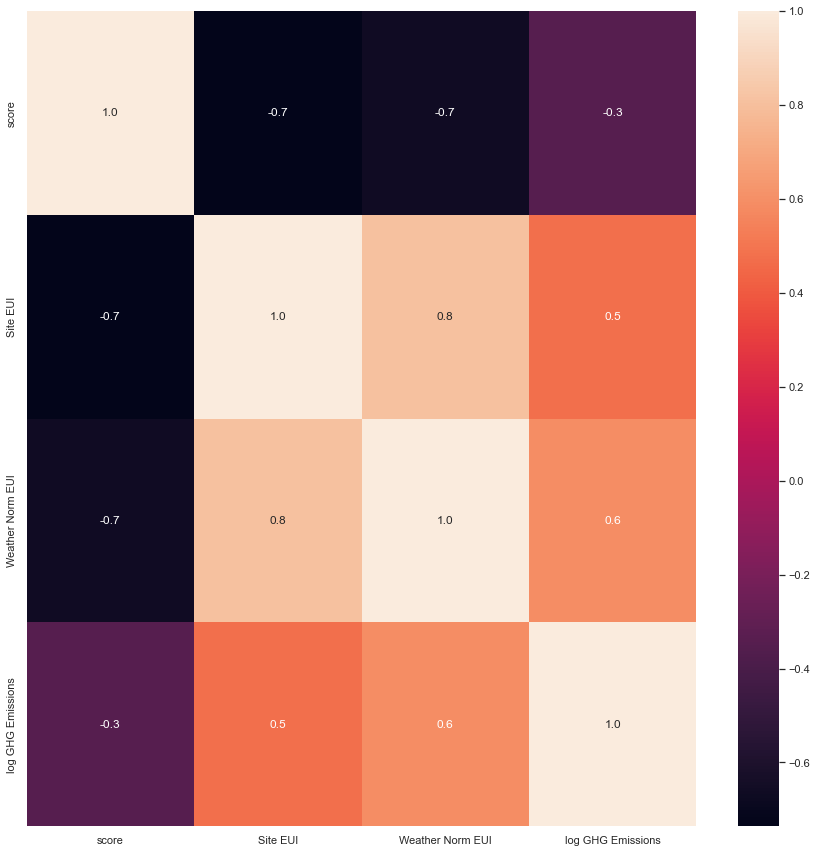

In [197]:
sb.heatmap(plot_data.corr(), annot=True,fmt='.1f')

На графиках можно увидеть, как соотносятся некоторые признаки и соотнести их числовые и визуальные отношения 

## Конструирование признаков

### Выбор признаков 

Выберем только часть признаков - закодированные категориальные 'Borough', 'Largest Property Use Type', числовые и их логарифмы

In [198]:
features = df.copy()

numeric_subset = df.select_dtypes('number')

for col in numeric_subset.columns:
    if col == 'score':
        continue
        
    numeric_subset['log_' + col]= np.log(features[col])

categorical_subset = df[['Borough', 'Largest Property Use Type']]
categorical_subset = pd.get_dummies(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis=1)

features.shape

C:\Users\VPR\AppData\Local\Temp/ipykernel_12732/2373310966.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subset['log_' + col]= np.log(features[col])
c:\Users\VPR\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\VPR\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(11319, 110)

Теперь есть более готовый сет, но его нужно проредить по признакам, так как не все из них имеют значимую взаимосвязь с целевой переменной

### Выбор признаков

Нужно избавиться от коллинеаров, признаков, имеющих сильную корреляцию друг с другом

Сильной корреляцией будем считать значение большее или равное 0,6

In [199]:
def remove_collinear_features(df: pd.DataFrame, target: float) -> pd.DataFrame:
    y = df.score
    x = df.drop(columns=['score'])

    corr_matrix = x.corr()
    iterator = range(len(corr_matrix.columns) - 1)
    columns_for_drop = []

    for i in iterator:
        for j in range(i):
            item = corr_matrix.iloc[j:j+1, i+1:i+2]
            col = item.columns

            if abs(item.values) >= target:
                columns_for_drop.append(col.values[0])
                
    x = x.drop(columns=set(columns_for_drop))

    x['score'] = y

    return x


In [200]:
features = remove_collinear_features(features, 0.6)
print(type(features))
features = features.dropna(subset=['score'])
features.shape

<class 'pandas.core.frame.DataFrame'>


(9461, 70)

Теперь у нас есть очищенный от созависимых колонок датасет

## Разбиение модели

([<matplotlib.patches.Wedge at 0x141bfb460d0>,
 [Text(1.074633408954662, 0.23486812546295435, ''),
  Text(0.9691269586169023, 0.520377687917106, ''),
  Text(0.9022470380123235, 0.6292458044341567, ''),
  Text(0.8340042562805945, 0.717242567410672, ''),
  Text(0.762496461870011, 0.7928424469185004, ''),
  Text(0.685593960444435, 0.8602098124307318, ''),
  Text(0.6039907164223796, 0.9193449920870733, ''),
  Text(0.5179624989822716, 0.9704199346922138, ''),
  Text(0.43101245894897944, 1.012041629692551, ''),
  Text(0.34352944690049975, 1.0449820664069969, ''),
  Text(0.25356554190769914, 1.0703758760160167, ''),
  Text(0.16213172445390694, 1.0879858932567106, ''),
  Text(0.07026520213650651, 1.097753524871916, ''),
  Text(-0.021366559322968885, 1.099792466851223, ''),
  Text(-0.11248664082747448, 1.0942334100343267, ''),
  Text(-0.20283198013455747, 1.0811379134202512, ''),
  Text(-0.29142813790540273, 1.0606930000886166, ''),
  Text(-0.377690090219816, 1.0331264180872288, ''),
  Text(-0.

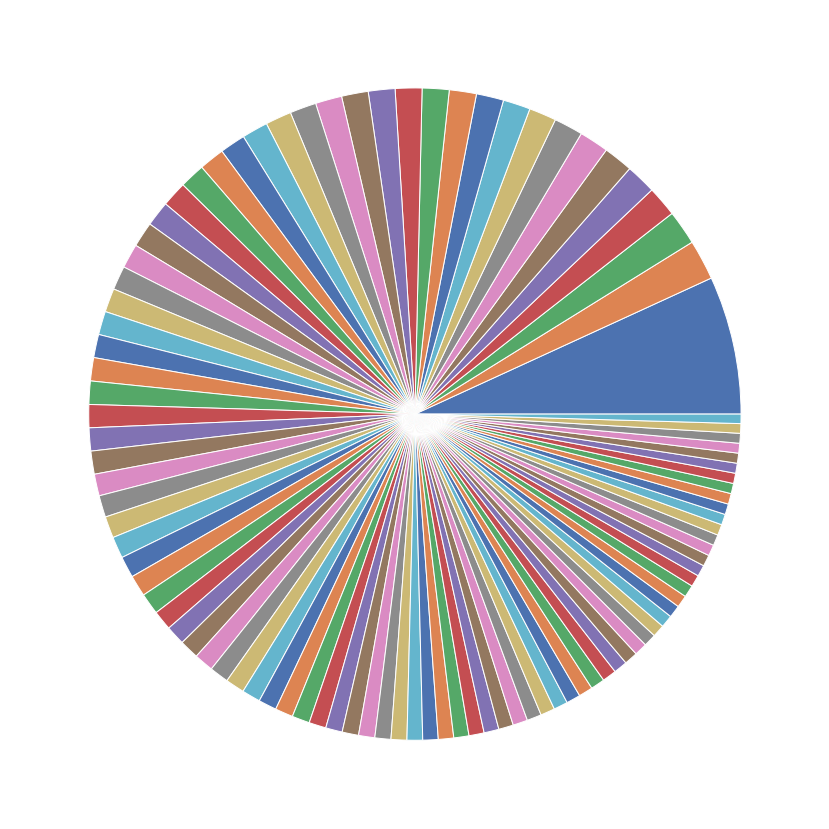

In [201]:
mpl .pie(df.score.value_counts())

Из графика видно, что данные не совсем сбалансированными, присутствует значительный выброс по концентрации в одном из значений

In [202]:
from sklearn.model_selection import train_test_split

y = features.score
x = features.drop(columns= ['score'])


### Заполнение пропусков

Не смотря на то, что мы избавились от строк, где больше половины пропусков, остались строки, где все еще они есть

In [203]:
x.isna().sum()[lambda value: value > 0]

DOF Gross Floor Area                                            48
Weather Normalized Site EUI (kBtu/ft²)                        1066
Weather Normalized Site Electricity Intensity (kWh/ft²)        475
Weather Normalized Site Natural Gas Intensity (therms/ft²)    1381
Water Use (All Water Sources) (kgal)                          3034
Water Intensity (All Water Sources) (gal/ft²)                 3034
Latitude                                                      1799
Longitude                                                     1799
Community Board                                               1799
Census Tract                                                  1799
log_Direct GHG Emissions (Metric Tons CO2e)                     13
log_Water Use (All Water Sources) (kgal)                      3034
log_Water Intensity (All Water Sources) (gal/ft²)             3034
log_Longitude                                                 9461
dtype: int64

Модели плохо работают с пропусками, по этому их нужно заполнить

Был выбран самый просто способ - медианное заполнение

In [204]:
x = x.replace({ np.inf: np.nan, -np.inf: np.nan })

In [205]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

imputer.fit(x)

x = data=imputer.transform(x)

### Масштабирование значений

Масштабирование признаков требуется для работы некоторых моделей, я для других это может улучшить результат

In [206]:
from sklearn.preprocessing import MinMaxScaler

scaler  = MinMaxScaler()

scaler.fit(x)

x = scaler.transform(x)

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
y_test = np.array(y_test).reshape((-1,))
y_train = np.array(y_train).reshape((-1,))

Так же нужно рассчитать среднюю абсолютную ошибку(mae)

In [208]:
def mae(y_true, y_pred):
    print(y_true, y_pred)
    return np.mean(abs(y_true - y_pred))

In [209]:
baseline_guess = np.median(y_train)
baseline_guess

66.0

In [210]:
mae(y_test, baseline_guess)
'adfsadsfff'

[13. 55. 87. ... 83. 51. 96.] 66.0


'adfsadsfff'

Это будет показателем для оценки качества модели

Наверное, так делают, при оценки точности регрессии

## Обучение модели

### Некоторые полезные функции

In [211]:
def learn(model) -> float:
    model.fit(x_train, y_train)

    y_predicted = model.predict(x_test)
    return mae(y_test, y_predicted)


### Линейная регрессия

In [212]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr_mae = learn(lr)
print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

[13. 55. 87. ... 83. 51. 96.] [29.63601808 57.45150579 56.65733635 ... 65.74747203 64.49364376
 88.3833445 ]
Linear Regression Performance on the test set: MAE = 13.4581


### Скалярные вектора

In [213]:
from sklearn.svm import SVR

svr = SVR(C=1000, gamma=0.1)
svr_mae = learn(svr)
print('Linear Regression Performance on the test set: MAE = %0.4f' % svr_mae)


[13. 55. 87. ... 83. 51. 96.] [21.04036233 53.63207052 55.20684894 ... 75.33943291 66.94238519
 84.864462  ]
Linear Regression Performance on the test set: MAE = 10.8088


### Случайный лес

In [214]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=42)
random_forest_mae = learn(random_forest)
print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)


[13. 55. 87. ... 83. 51. 96.] [21.76 50.89 55.07 ... 80.91 68.35 98.07]
Random Forest Regression Performance on the test set: MAE = 9.5188


### Градиентный бустинг

In [215]:
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(random_state=42)
boost_mae = learn(boost)
print('Gradient Boosting Regression Performance on the test set: MAE = %0.4f' % boost_mae)

[13. 55. 87. ... 83. 51. 96.] [17.48739876 49.85965953 58.72846119 ... 78.52926323 66.96676257
 93.08593998]
Gradient Boosting Regression Performance on the test set: MAE = 10.1670


### Соседи

In [216]:
from sklearn.neighbors import KNeighborsRegressor

kneighbors = KNeighborsRegressor(n_neighbors=8)
kneighbors_mae = learn(kneighbors)
print('KNeighbors Regression Performance on the test set: MAE = %0.4f' % kneighbors_mae)


[13. 55. 87. ... 83. 51. 96.] [27.25  73.    47.5   ... 74.    69.375 99.75 ]
KNeighbors Regression Performance on the test set: MAE = 12.3651


### Анализ результатов

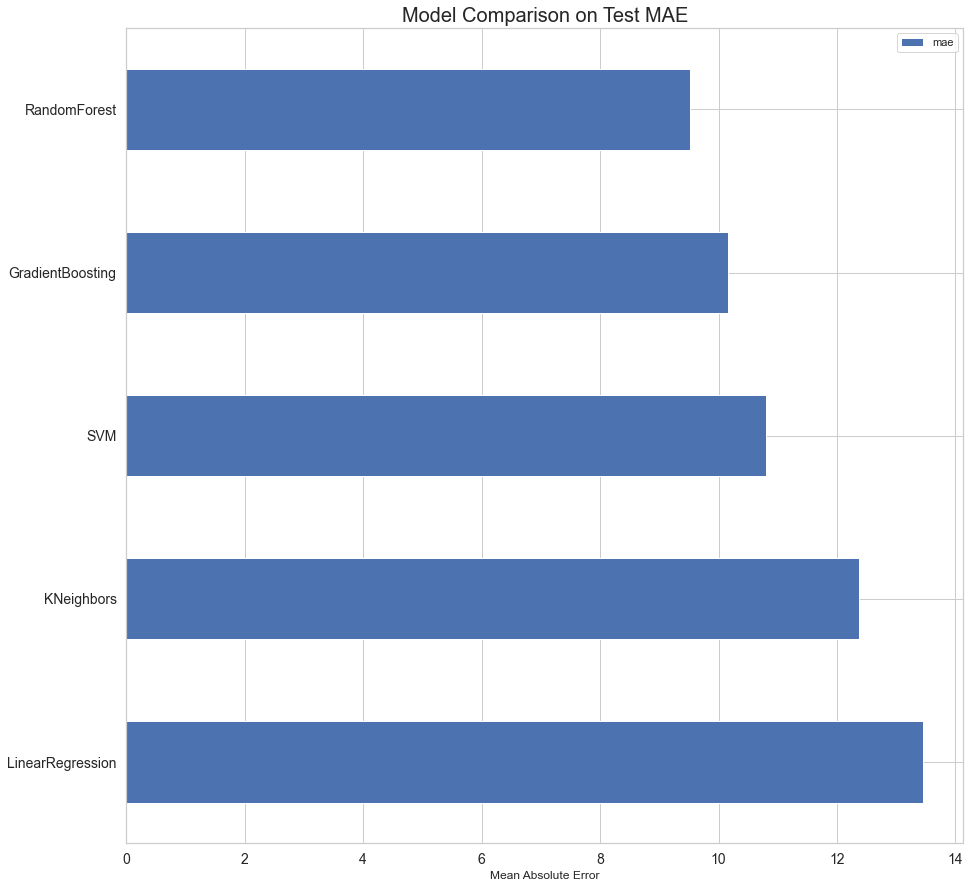

In [217]:
models = pd.DataFrame({
    "model": ["LinearRegression", "SVM", "RandomForest", "GradientBoosting", "KNeighbors"],
    "mae": [lr_mae, svr_mae, random_forest_mae, boost_mae, kneighbors_mae]
})

models.sort_values('mae', ascending=False).plot(x='model', y='mae', kind='barh')
mpl.ylabel(''); mpl.yticks(size = 14); mpl.xlabel('Mean Absolute Error'); mpl.xticks(size = 14)
mpl.title('Model Comparison on Test MAE', size = 20);

MEA - средняя абсолютная ошибка, т.е. чем меньше значение, тем лучше

И чего можно сделать вывод, что лучше всего справилась модель леса, но градиент тоже находится рядом
В дальнейшем будет выбран лес для улучшения результатов

## Подбор гиперпараметров

In [218]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8]
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]
bootstrap = [True, False]


hyperparams_forest = {
    'max_features':  max_features,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'bootstrap': bootstrap
}


In [219]:
from sklearn.model_selection import RandomizedSearchCV

forest = RandomForestRegressor(random_state=42,)
random_scv = RandomizedSearchCV(estimator=forest,
                                param_distributions=hyperparams_forest,
                                 cv=4, n_iter=25,
                                scoring='neg_mean_absolute_error',
                                n_jobs=-1,verbose=1,
                                return_train_score=True,
                                random_state=42
                                )


In [220]:
random_scv.fit(x_train, y_train)
random_scv.best_params_

Fitting 4 folds for each of 25 candidates, totalling 100 fits


In [ ]:
random_result = pd.DataFrame(random_scv.cv_results_).sort_values('mean_test_score', ascending=False)
random_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
8,44.955330,0.425351,0.418619,0.080497,1100,10,2,auto,15,True,"{'n_estimators': 1100, 'min_samples_split': 10...",-9.254167,-9.074218,-9.534423,-9.448758,-9.327891,0.178220,1,-5.274733,-5.334109,-5.240979,-5.278863,-5.282171,0.033394
11,40.937405,1.961668,0.264612,0.012354,1100,10,2,auto,10,True,"{'n_estimators': 1100, 'min_samples_split': 10...",-9.340270,-9.160768,-9.597030,-9.523704,-9.405443,0.169414,2,-6.611650,-6.651478,-6.492908,-6.571913,-6.581988,0.058620
24,4.394880,0.605898,0.032919,0.007037,100,10,1,None,10,True,"{'n_estimators': 100, 'min_samples_split': 10,...",-9.375030,-9.130086,-9.662529,-9.589054,-9.439175,0.207365,3,-6.649299,-6.657629,-6.541326,-6.619430,-6.616921,0.045897
20,3.339109,0.017499,0.029093,0.006175,100,4,8,auto,15,True,"{'n_estimators': 100, 'min_samples_split': 4, ...",-9.490850,-9.340644,-9.744066,-9.770047,-9.586402,0.178963,4,-7.100506,-7.056531,-6.959443,-7.023480,-7.034990,0.051469
3,51.892400,1.074692,0.349531,0.019357,1500,6,8,auto,10,True,"{'n_estimators': 1500, 'min_samples_split': 6,...",-9.502423,-9.353019,-9.741957,-9.748716,-9.586529,0.167379,5,-7.433786,-7.430526,-7.279067,-7.329374,-7.368188,0.066404
2,2.294582,0.238886,0.029066,0.016426,100,2,6,auto,5,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",-10.726571,-10.441467,-10.745239,-10.752269,-10.666386,0.130196,6,-10.223171,-10.255305,-10.114524,-10.112790,-10.176447,0.063813
4,2.572108,0.334780,0.017754,0.002095,100,6,2,None,5,True,"{'n_estimators': 100, 'min_samples_split': 6, ...",-10.746598,-10.411806,-10.746611,-10.764336,-10.667338,0.147709,7,-10.196072,-10.256975,-10.107977,-10.106557,-10.166895,0.063399
1,52.116040,0.924427,0.257918,0.025657,900,4,1,None,10,False,"{'n_estimators': 900, 'min_samples_split': 4, ...",-11.096985,-10.527084,-11.477730,-10.940191,-11.010498,0.340741,8,-6.297834,-6.331553,-6.233634,-6.138569,-6.250397,0.073524
0,50.513904,2.361216,0.286367,0.057530,1500,6,6,None,5,False,"{'n_estimators': 1500, 'min_samples_split': 6,...",-11.422372,-11.170412,-11.353626,-11.482445,-11.357214,0.117086,9,-10.767642,-10.876790,-10.813296,-10.850699,-10.827107,0.041085
16,16.905964,0.752055,0.084707,0.009028,500,6,6,None,5,False,"{'n_estimators': 500, 'min_samples_split': 6, ...",-11.422372,-11.170412,-11.353626,-11.482445,-11.357214,0.117086,10,-10.767642,-10.876790,-10.813296,-10.850699,-10.827107,0.041085


Теперь посмотрим на диаграмме, как относятся значения гиперпараметров, к САО

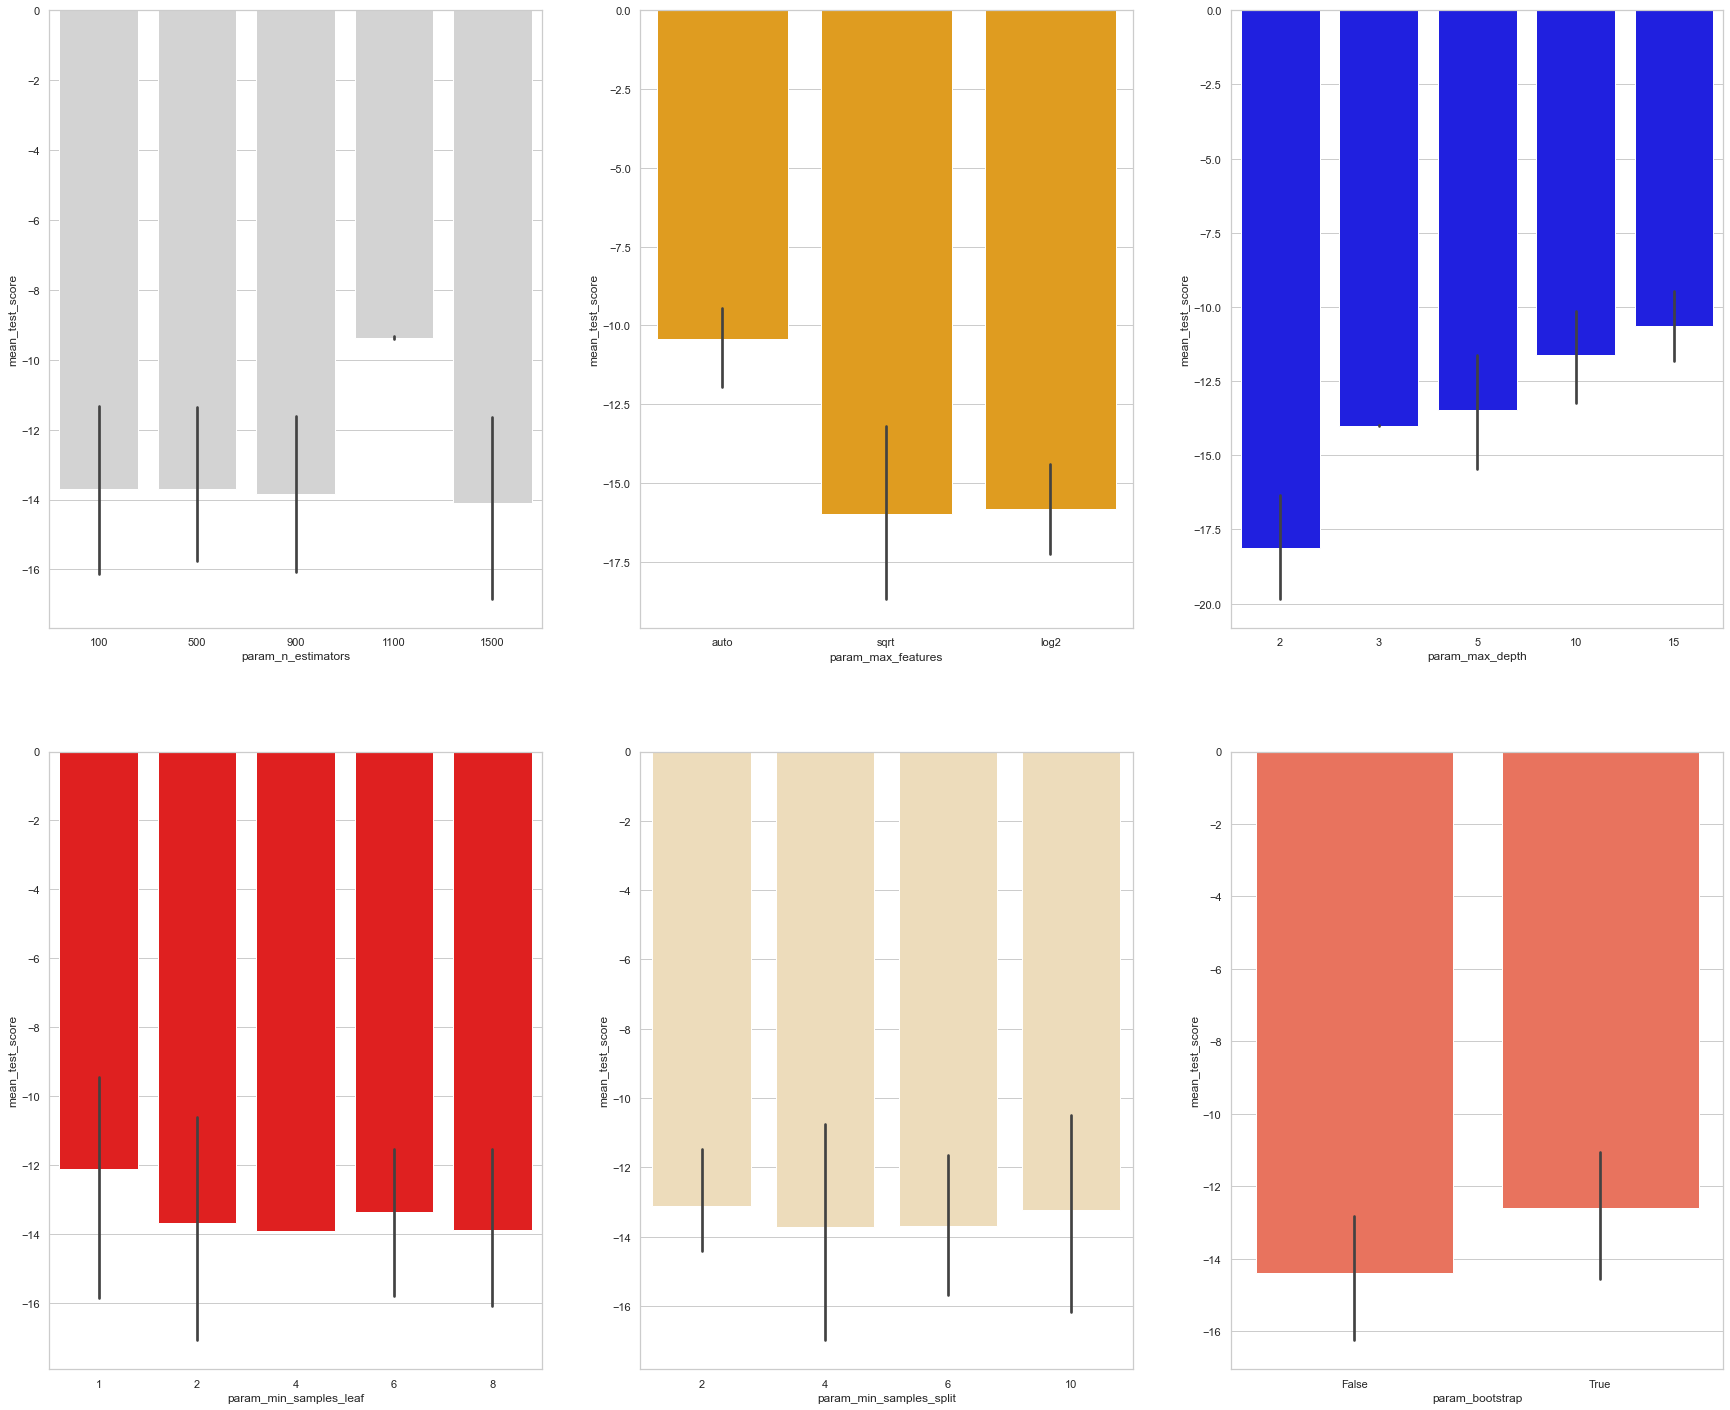

In [ ]:
fig, axs = mpl.subplots(ncols=3, nrows=2)
sb.set(style='whitegrid', color_codes=True)
fig.set_size_inches(30,25)
sb.barplot(x='param_n_estimators', y='mean_test_score', data=random_result, ax=axs[0, 0], color='lightgrey')
sb.barplot(x='param_max_features', y='mean_test_score', data=random_result, ax=axs[0, 1], color='orange')
sb.barplot(x='param_max_depth', y='mean_test_score', data=random_result, ax=axs[0, 2], color='blue')
sb.barplot(x='param_min_samples_leaf', y='mean_test_score', data=random_result, ax=axs[1, 0], color='red')
sb.barplot(x='param_min_samples_split', y='mean_test_score', data=random_result, ax=axs[1, 1], color='wheat')
sb.barplot(x='param_bootstrap', y='mean_test_score', data=random_result, ax=axs[1, 2], color='tomato')
mpl.show()

На графике мы наглядно видим, при каких значениях модель показывает себя лучше всего

### Довыбор гипер параметров

После первичного сужения параметров, можно провести более кропотливый подбор, используя GridSearchSV

In [ ]:
hyperparams_forest_gs = {
    'n_estimators':np.arange(1000, 1200, 50),
    'min_samples_split': [2,10]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor(random_state=42, bootstrap=True, max_depth=15,min_samples_leaf=1 )

grid_search = GridSearchCV(estimator=forest, 
                    param_grid=hyperparams_forest_gs,
                    cv=4,  n_jobs=-1,
                    scoring='neg_mean_absolute_error',
                    return_train_score=True)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=RandomForestRegressor(max_depth=15, random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_split': [2, 10],
                         'n_estimators': array([1000, 1050, 1100, 1150])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=15, n_estimators=1150, random_state=42)

In [ ]:
results = grid_search.cv_results_

Сравнение точности работы стартовой и финальной модели

In [ ]:
default_model = RandomForestRegressor(random_state=42)

final_model = grid_search.best_estimator_

In [ ]:
default_model.fit(x_train, y_train)
default_predication = default_model.predict(x_test)
default_mae = mae(y_test, default_predication)
print('Default Random Forest Regression Performance on the test set: MAE = %0.4f' % default_mae)


[13. 55. 87. ... 83. 51. 96.] [21.76 50.89 55.07 ... 80.91 68.35 98.07]
Default Random Forest Regression Performance on the test set: MAE = 9.5188


Посмотрим точность значений у стандартной модели

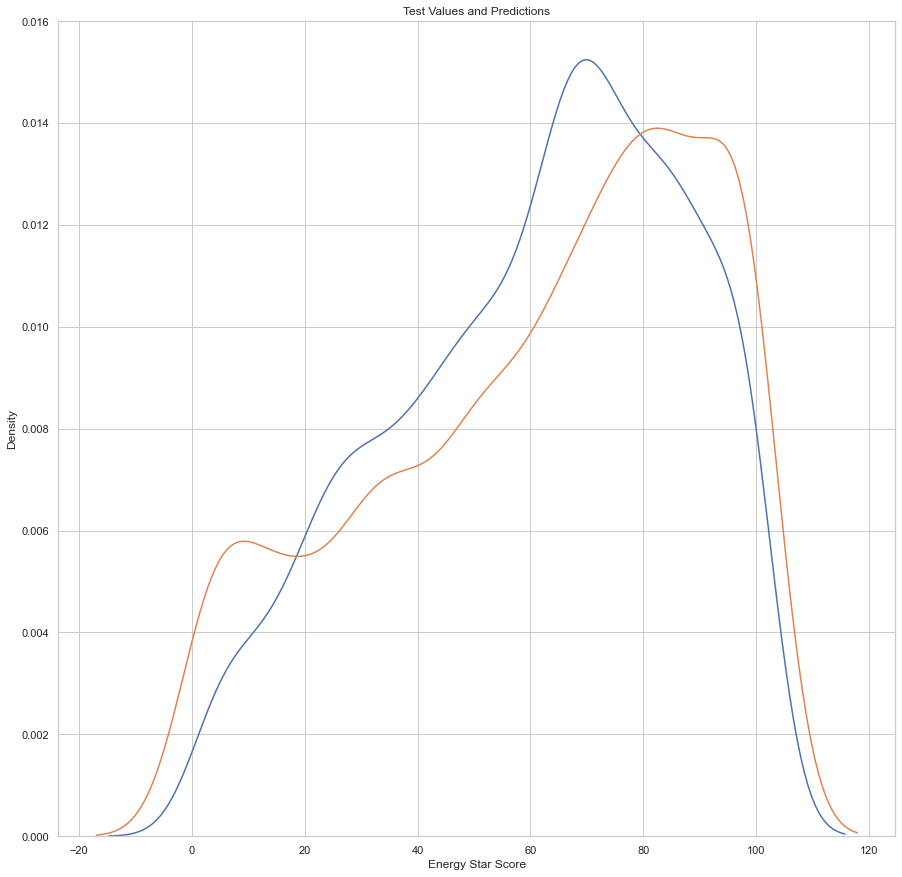

In [ ]:
sb.kdeplot(default_predication, label='Default predication')
sb.kdeplot(y_test, label='True value')

mpl.xlabel('Energy Star Score'); mpl.ylabel('Density');
mpl.title('Test Values and Predictions');

In [ ]:
final_model.fit(x_train, y_train)
final_predication = final_model.predict(x_test)
final_mae = mae(y_test, final_predication)
print('Final Random Forest Regression Performance on the test set: MAE = %0.4f' % final_mae)


[13. 55. 87. ... 83. 51. 96.] [22.16187799 51.89157506 53.30669943 ... 81.24937525 66.05122241
 98.33441042]
Final Random Forest Regression Performance on the test set: MAE = 9.5282


Посмотрим точность значений у финальной модели

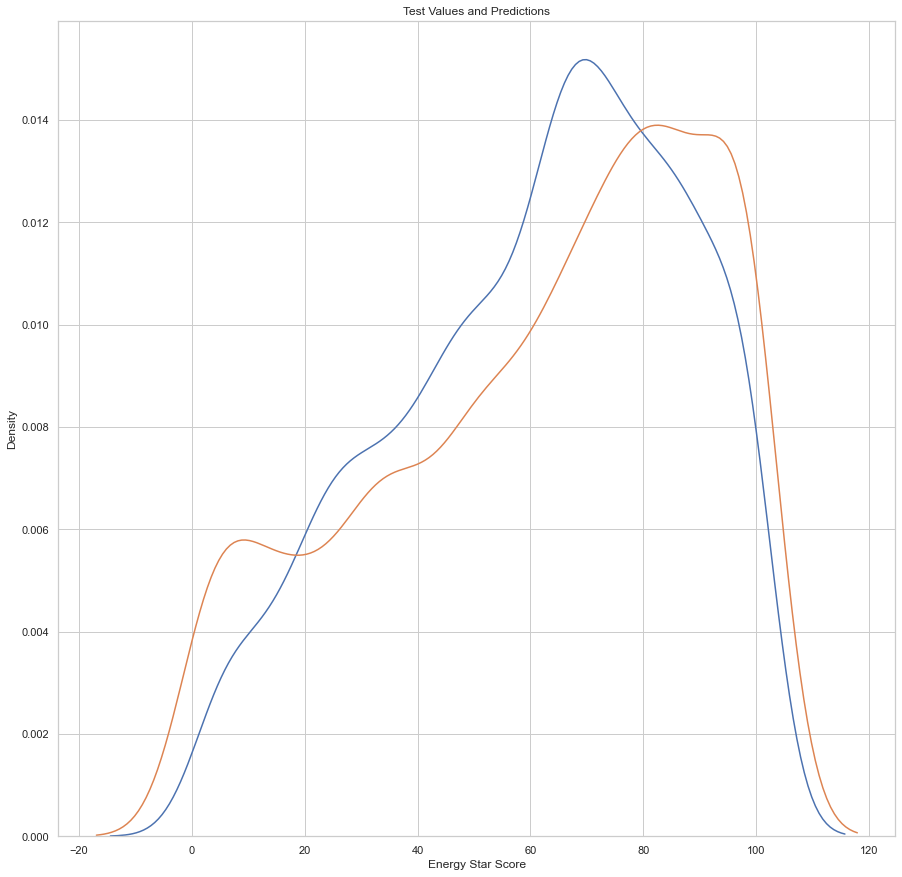

In [ ]:
sb.kdeplot(final_predication, label='Final predication')
sb.kdeplot(y_test, label='True value')

mpl.xlabel('Energy Star Score'); mpl.ylabel('Density');
mpl.title('Test Values and Predictions');

# Вывод

С помощью МО можно на данных можно предсказать баллы расхожа электроэнергии. Лучше всего себя показал случайный лес, со средней ошибкой в 9,5. С помощью гипер параметров не удалось увеличить точность, но длительности работы существенно возросла